Working model of the solar system. Includes the sun in its calculations. Uses the integration from the wiki.

In [1]:
bodies = ["Sun", "Mercury", "Venus", "Earth", "Mars", "Jupiter", "Saturn", "Uranus", "Neptune", "Pluto"]
masses = [1.989e30 ,0.330e24,4.87e24,5.97e24,0.642e24,1898e24,568e24,86.8e24,102e24,0.0146e24]
x = [0., -1.407280799640445E-01 , -7.186302169039649E-01, -1.685246489174995E-01, 1.390361066087240E+00, 4.003460488693537E+00, 6.408556036146941E+00, 1.443051758274212E+01, 1.681075772645494E+01, -9.876867451525346E+00]
y = [0., -4.439009577663330E-01, -2.250380105571625E-02, 9.687833048228511E-01, -2.100972123734226E-02, 2.935353187887882E+00, 6.568042755297438E+00, -1.373565828163257E+01, -2.499265127854257E+01, -2.795802118693108E+01] 
z = [0., -2.334555971312334E-02, 4.117184137682463E-02, -4.120973411130758E-06, -3.461801385164819E-02, -1.018230443988181E-01, -3.691272890761793E-01, -2.474809404498369E-05, 1.272705717438095E-01, 5.850814657388042E+00]
vx = [0., 2.116887137167173E-02, 5.135327579269579E-04, -1.723394583068879E-02, 7.479271243289054E-04, -4.563750795379206E-03, -4.290540499848893E-03, 2.678466083136532E-03, 2.579216849517761E-03, 3.039016380795775E-03]
vy = [0., -7.097975438870807E-03, -2.030614162239802E-02, -3.007660259271771E-03, 1.518629867736057E-02, 6.447274222742638E-03, 3.891990891483582E-03, 2.672427506613704E-03, 1.776355179608279E-03, -1.529879110198215E-03]
vz = [0., -2.522830951443754E-03, -3.071745100210852E-04, 3.562931614781975E-08, 2.997531995727463E-04, 7.547009668026901E-05, 1.026097521772974E-04, -2.474809404498369E-05, -9.620004658366438E-05, -7.172417049506235E-04]
def init_cond(bodies,x,y,z,vx,vy,vz,masses):
    # x,y,z in AU and vx,vy,vz in AU/d
    init_cond_array = []
    for n in range(len(bodies)):
            init_cond_array.append((bodies[n],x[n],y[n],z[n],vx[n],vy[n],vz[n],masses[n]))
    return init_cond_array

##index bodies = sun 0, mercury 1, venus 2, earth 3, mars 4, jupiter 5, saturn 6, uranus 7 , neptune 8, pluto 9
## index data = name 0, x 1, y 2, z 3, vx 4, vy 5, vz 6, masses 7
## example : x velocity jupiter = array[5][4]
array = init_cond(bodies,x,y,z,vx,vy,vz,masses)
#print(array)
#print(array[5][4])
        
print(len(masses))

10


In [2]:
import numpy as np

G = 6.67408e-11 /( (1.496e+11)**3 * (1.15741e-5)**2 )   # Conversion of m^3 kg^-1 s^-2 to AU^3 kg^-1 d^-2

def gravitational_accel(j,pos,masses):
    """returns acceleration vector of object 'j' in the form [a_x,a_y,a_z].
    Variable 'pos' is of the from '[[x1,y1,z1],[x2,y2,z2],...]'.
    Variable 'masses' is of the form '[mass1,mass2,...]'
    """
    
    a = np.zeros(3)   # a = [0,0,0]
    
    for i in range(len(masses)):
        if i!=j:
            a += G*masses[i]*(pos[i]-pos[j])/np.sum((pos[i]-pos[j])**2)**1.5
    return a

def RK_k(k_prev,self,over2=1):
    """Function to calculate k2, k3, k4 from Runge-Kutta.
    """
    acc_array_k = np.zeros((len(k_prev),3))
    if over2==1:
        for i, b in enumerate(self.bodies):
            acc_k = gravitational_accel(i,old_posarray+dt*k_prev/2,massarray)
            acc_array_k[i] = acc_k
    if over2==0:
        for i, b in enumerate(self.bodies):
            acc_k = gravitational_accel(i,old_posarray+dt*k_prev,massarray)
            acc_array_k[i] = acc_k
    return acc_array_k

In [3]:
posarray = np.empty([len(bodies),3])
velarray = np.empty([len(bodies),3])
massarray = np.empty(len(bodies))
for j in range(len(bodies)):
    array = init_cond(bodies,x,y,z,vx,vy,vz,masses)[j]
    poslist = array[1:4]
    vellist = array[4:7]
    masslist = array[7]
    posarray[j] = poslist
    velarray[j] = vellist
    massarray[j] = masslist

In [4]:
%matplotlib notebook

<IPython.core.display.Javascript object>


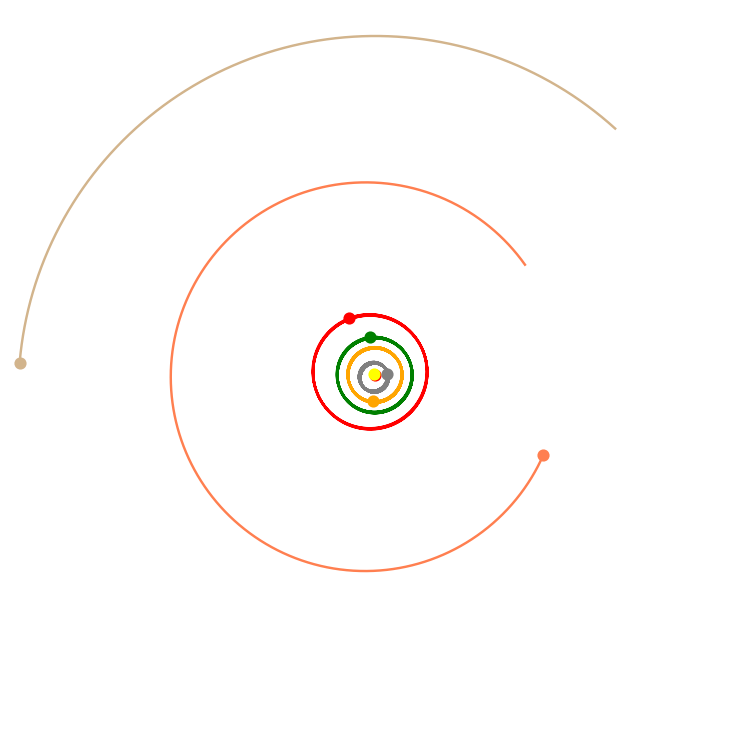

In [5]:
"""Runge-Kutta integration"""
import json
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from datetime import date, datetime, timedelta

t = 3650   # 3650 = 10 years

class Object:
    def __init__(self, name, color, pos, vel):
        self.name = name
        self.pos    = np.array(pos, dtype=np.float)
        self.vel    = np.array(vel, dtype=np.float)
        self.x = []
        self.y = []
        self.plot = ax.scatter(pos[0], pos[1], color=color)
        self.line, = ax.plot([], [], color=color, linewidth=1.4)
        
class SolarSystem:
    def __init__(self, center):
        self.center = center
        self.bodies = []
        ###self.time = None
        #self.timestamp = ax.text(.03, .94, 'Date: ', color='w', transform=ax.transAxes, fontsize='x-large')
    def add_planet(self, body):
        self.bodies.append(body)
    
    def evolve(self): # evolve the trajectories
        
        dt = 1
        #self.time += timedelta(dt)
        plots = []
        lines = []
        k1 = new_velarray
        
        k2 = np.zeros((len(k1),3))
        k3 = np.zeros((len(k1),3))
        k4 = np.zeros((len(k1),3))
        
        k2 = new_velarray + RK_k(k1,1,self)*dt/2
        k3 = new_velarray + RK_k(k2,1,self)*dt/2
        k4 = new_velarray + RK_k(k3,0,self)*dt
        
        for i, b in enumerate(self.bodies):
            
            new_posarray[i] = old_posarray[i] + dt*(k1[i] + 2*k2[i] + 2*k3[i] + k4[i])/6
            old_posarray[i] = new_posarray[i]
            
            acc = gravitational_accel(i,new_posarray,massarray)
            new_velarray[i] += acc*dt
            
            b.x.append(new_posarray[i][0])
            b.y.append(new_posarray[i][1])
            b.plot.set_offsets(new_posarray[i][:2])
            plots.append(b.plot)
            b.line.set_xdata(b.x)
            b.line.set_ydata(b.y)
            lines.append(b.line)
        #if len(b.x) > 10000:
            #raise SystemExit("Stopping after a long run to prevent memory overflow")
        #self.timestamp.set_text('Date: {}'.format(self.time.isoformat()))
        
        return plots + lines #+ [self.timestamp]


new_posarray = posarray.copy()
old_posarray = posarray.copy()
new_velarray = velarray.copy()


fig = plt.figure(figsize=[6, 6])
ax = plt.axes([0., 0., 1., 1.], xlim=(-10, 10), ylim=(-10,10))
ax.set_aspect('equal')
ax.axis('off')
ss = SolarSystem(Object("Sun",'red', [0., 0., 0.], [0., 0., 0.]))
body_numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]   # The 1st, 2nd, 3rd, and 4th planet in solar system
colors = ['yellow', 'grey', 'orange','green','red','coral','tan','aqua','blue','maroon']
for i, body_number in enumerate(body_numbers):
    ss.add_planet(Object(body_number, colors[i], posarray[i], velarray[i]))

def animate(i):
    return ss.evolve()
ani = animation.FuncAnimation(fig, animate, repeat=False, frames=t, blit=True, interval=1,)
plt.show()
# ani.save('solar_system_6in_150dpi.mp4', fps=60, dpi=150)

In [ ]:
"""Default integration"""
import json
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from datetime import date, datetime, timedelta

t = 3650   # 3650 = 10 years

class Object:
    def __init__(self, name, color, pos, vel):
        self.name = name
        self.pos    = np.array(pos, dtype=np.float)
        self.vel    = np.array(vel, dtype=np.float)
        self.x = []
        self.y = []
        self.plot = ax.scatter(pos[0], pos[1], color=color)
        self.line, = ax.plot([], [], color=color, linewidth=1.4)
        
class SolarSystem:
    def __init__(self, center):
        self.center = center
        self.bodies = []
        ###self.time = None
        #self.timestamp = ax.text(.03, .94, 'Date: ', color='w', transform=ax.transAxes, fontsize='x-large')
    def add_planet(self, body):
        self.bodies.append(body)
    def evolve(self): # evolve the trajectories
        dt = 1
        #self.time += timedelta(dt)
        plots = []
        lines = []
        for i, b in enumerate(self.bodies):
            
            #new_posarray[i] -= new_posarray[0]   # subtract movement of the sun (experimental)
            
            new_posarray[i] += new_velarray[i]*dt
            acc = gravitational_accel(i,new_posarray,massarray)
            new_velarray[i] += acc*dt
            b.x.append(new_posarray[i][0])
            b.y.append(new_posarray[i][1])
            b.plot.set_offsets(new_posarray[i][:2])
            plots.append(b.plot)
            b.line.set_xdata(b.x)
            b.line.set_ydata(b.y)
            lines.append(b.line)
        #if len(b.x) > 10000:
            #raise SystemExit("Stopping after a long run to prevent memory overflow")
        #self.timestamp.set_text('Date: {}'.format(self.time.isoformat()))
        return plots + lines #+ [self.timestamp]

new_posarray = posarray.copy()
new_velarray = velarray.copy()

fig = plt.figure(figsize=[6, 6])
ax = plt.axes([0., 0., 1., 1.], xlim=(-10, 10), ylim=(-10,10))
ax.set_aspect('equal')
ax.axis('off')
ss = SolarSystem(Object("Sun",'red', [0., 0., 0.], [0., 0., 0.]))
body_numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]   # The 1st, 2nd, 3rd, and 4th planet in solar system
colors = ['yellow', 'grey', 'orange','green','red','coral','tan','aqua','blue','maroon']
for i, body_number in enumerate(body_numbers):
    ss.add_planet(Object(body_number, colors[i], posarray[i], velarray[i]))

def animate(i):
    return ss.evolve()
ani = animation.FuncAnimation(fig, animate, repeat=False, frames=t, blit=True, interval=1,)
plt.show()
# ani.save('solar_system_6in_150dpi.mp4', fps=60, dpi=150)

In [ ]:
"""Original version used in this notebook"""
import json
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from datetime import date, datetime, timedelta

t = 100000

class Object:
    def __init__(self, name, color, pos, vel):
        self.name = name
        self.pos    = np.array(pos, dtype=np.float)
        self.vel    = np.array(vel, dtype=np.float)
        self.x = []
        self.y = []
        self.plot = ax.scatter(pos[0], pos[1], color=color)
        self.line, = ax.plot([], [], color=color, linewidth=1.4)
        
class SolarSystem:
    def __init__(self, center):
        self.center = center
        self.bodies = []
        ###self.time = None
        #self.timestamp = ax.text(.03, .94, 'Date: ', color='w', transform=ax.transAxes, fontsize='x-large')
    def add_planet(self, body):
        self.bodies.append(body)
    def evolve(self): # evolve the trajectories
        dt = 1
        #self.time += timedelta(dt)
        plots = []
        lines = []
        for i, b in enumerate(self.bodies):
            b.pos += b.vel * dt
            acc = -2.959e-4 * b.pos / np.sum(b.pos**2)**(1.5)  # in units of AU/day^2
            #acc = gravitational_accel(i,posarray,massarray)
            print(b.vel)
            b.vel += acc * dt
            b.x.append(b.pos[0])
            b.y.append(b.pos[1])
            b.plot.set_offsets(b.pos[:2])
            plots.append(b.plot)
            b.line.set_xdata(b.x)
            b.line.set_ydata(b.y)
            lines.append(b.line)
        #if len(b.x) > 10000:
            #raise SystemExit("Stopping after a long run to prevent memory overflow")
        #self.timestamp.set_text('Date: {}'.format(self.time.isoformat()))
        return plots + lines #+ [self.timestamp]

fig = plt.figure(figsize=[6, 6])
ax = plt.axes([0., 0., 1., 1.], xlim=(-10, 10), ylim=(-10,10))
ax.set_aspect('equal')
ax.axis('off')
ss = SolarSystem(Object("Sun",'red', [0., 0., 0.], [0., 0., 0.]))
body_numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]   # The 1st, 2nd, 3rd, and 4th planet in solar system
colors = ['yellow', 'grey', 'orange','green','red','coral','tan','aqua','blue','maroon']
for i, body_number in enumerate(body_numbers):
    ss.add_planet(Object(body_number, colors[i], posarray[i], velarray[i]))

def animate(i):
    return ss.evolve()

ani = animation.FuncAnimation(fig, animate, repeat=False, frames=t, blit=True, interval=1,)
plt.show()
# ani.save('solar_system_6in_150dpi.mp4', fps=60, dpi=150)

In [ ]:
print(np.zeros((len(velarray),3)))